<a href="https://colab.research.google.com/github/xuanthang482/CS114.K21_CourseProject/blob/master/ML_helmet_rec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/mydrive', True)


Mounted at /mydrive


In [ ]:
import cv2
import sys
from google.colab import files
from google.colab.patches import cv2_imshow

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from skimage.io import imread, imshow
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from imutils import paths
from keras.applications import VGG16
from keras.applications import imagenet_utils
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from skimage import io

In [ ]:
import os
import random
path = '/mydrive/My Drive/ML_Project/Train_helmet/'
filenames=os.listdir(path)

In [ ]:

categories=[]
for f_name in filenames:
    category=f_name.split('.')[0]
    if category=='1':
        categories.append('1')
    else:
        categories.append('0')

In [ ]:
f=[]
for imgpath in os.listdir(path):
  im = load_img(path+"/"+imgpath,target_size=(224,224))
  width, height = im.size
  xx = width*0.2
  yy =0
  w = width*0.9
  h = height*0.50
  # Cropped image of above dimension 
  # (It will not change orginal image) 
  im1 =im.crop((xx, yy, w, h))
  im1= np.array (im1) 
  im2 = cv2.GaussianBlur(im1, (3, 3), 0)
  a = cv2.Canny(im2, 150, 200)
  a=cv2.resize(a,(224,224))
  f.append(a)
  # Shows theimage in image viewer 

In [ ]:

def features_grid(img):
    features = np.array([], dtype='uint8')
    section = 1
    for y in range(0, img.shape[0], 40):
        for x in range(0, img.shape[1], 40):

            # Cropping the image into a section.
            section_img = img[y:y+40, x:x+40] 
            # Claculating the mean and stdev of the sectioned image.
            section_mean = np.mean(section_img)
            section_std = np.std(section_img)
            
            # Appending the above calculated values into features array.
            features = np.append(features, [section_mean, section_std])
    
    # Returning the features array.
    return features

In [ ]:
def create_df_with_many_imgs(filesname,category):
  feature_names = []
  section = 1  
  for y in range(0, 224, 40):
    for x in range(0, 224, 40):
        feature_names.append(f"sec{section}_mean")
        feature_names.append(f"sec{section}_std")
        section += 1
  all_imgs = np.zeros((1, 72), dtype='uint8')
  #all_imgs = np.append(all_imgs, img_features, axis=0)
  for i in range(len(filesname)):
      img_features = features_grid(filesname[i])
      
      img_features = img_features.reshape(1, img_features.shape[0])

      all_imgs = np.append(all_imgs, img_features, axis=0)

  all_imgs = all_imgs[1:]

  df = pd.DataFrame(all_imgs, columns=feature_names)
  df.insert(loc=72, column="name", value=category)
  return df

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
labels = le.fit_transform(categories)
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,

In [ ]:
feature_df=create_df_with_many_imgs(f,labels)

In [ ]:
feature=feature_df[feature_names]
label=feature_df.name

In [ ]:
feature

,sec1_mean,sec1_std,sec2_mean,sec2_std,sec3_mean,sec3_std,sec4_mean,sec4_std,sec5_mean,sec5_std,sec6_mean,sec6_std,sec7_mean,sec7_std,sec8_mean,sec8_std,sec9_mean,sec9_std,sec10_mean,sec10_std,sec11_mean,sec11_std,sec12_mean,sec12_std,sec13_mean,sec13_std,sec14_mean,sec14_std,sec15_mean,sec15_std,sec16_mean,sec16_std,sec17_mean,sec17_std,sec18_mean,sec18_std,sec19_mean,sec19_std,sec20_mean,sec20_std,sec21_mean,sec21_std,sec22_mean,sec22_std,sec23_mean,sec23_std,sec24_mean,sec24_std,sec25_mean,sec25_std,sec26_mean,sec26_std,sec27_mean,sec27_std,sec28_mean,sec28_std,sec29_mean,sec29_std,sec30_mean,sec30_std,sec31_mean,sec31_std,sec32_mean,sec32_std,sec33_mean,sec33_std,sec34_mean,sec34_std,sec35_mean,sec35_std,sec36_mean,sec36_std
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.030000,52.111003,23.296875,57.314959,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.738125,51.310618,12.143750,43.271697,0.000000,0.000000,2.448125,19.732297,11.841250,42.587334,12.690625,42.995028,24.144375,58.841236,8.931250,35.529821,12.815625,41.780472,20.719375,52.416451,25.517500,59.342720,31.222500,64.154339,35.978750,67.228013,25.500000,56.932544,27.310000,58.801394,25.848125,56.938542,9.134375,36.380559,14.030625,45.696742,8.508750,34.204768,14.115625,43.749097,10.817708,39.945055,7.461458,32.196153,6.064583,31.119025,24.022917,57.360260,23.130208,54.849726,16.802083,50.297888
1,5.443750,28.896355,22.350625,56.089941,0.000000,0.000000,15.885625,49.169274,31.047500,62.684948,23.721875,57.757167,4.929375,27.677800,24.731250,58.585698,0.000000,0.000000,61.557500,78.388506,49.066875,73.778019,0.089583,1.917653,0.000000,0.000000,20.996250,54.932879,42.988750,72.256911,55.870625,76.916433,21.668125,54.329854,0.660417,9.267287,0.854375,12.051065,29.948125,63.678012,16.273750,48.332973,33.340000,65.727672,38.536875,71.117367,0.000000,0.000000,13.340000,44.480888,17.323750,49.954882,7.705625,33.015852,42.378125,74.212887,11.591875,43.336896,0.000000,0.000000,21.866667,55.666276,0.000000,0.000000,12.876042,43.916519,30.036458,64.599259,10.289583,41.012314,20.647569,54.376029
2,23.791250,57.724498,0.000000,0.000000,8.898125,37.592456,21.697500,53.413760,25.713125,59.738353,29.875000,62.347923,23.795625,56.560754,8.419375,36.872497,37.310625,68.682643,77.643750,81.623476,19.561875,53.164120,17.263542,51.203621,20.578125,54.136045,37.892500,69.444445,17.693750,49.362675,67.935625,81.661062,12.976250,45.100312,18.088542,52.172984,53.599375,75.829753,47.117500,74.439875,12.826250,44.106531,44.133750,71.452140,7.502500,35.756748,0.000000,0.000000,16.781875,49.380581,10.261250,40.347543,11.185625,43.300345,27.427500,61.556618,2.727500,20.313161,0.000000,0.000000,0.000000,0.000000,33.639583,65.318844,19.344792,50.592457,25.088542,58.637245,20.510417,55.089925,0.000000,0.000000
3,17.618125,50.844553,10.106875,40.041375,4.181875,26.770367,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.933125,45.939688,9.304375,37.533841,0.000000,0.000000,22.134375,56.135206,30.398125,63.964216,31.056250,62.336110,8.724375,36.569518,27.698125,60.689462,40.453750,70.590299,72.932500,80.730511,74.792500,81.422959,26.212500,59.143053,42.516875,69.493883,64.577500,79.875358,46.253750,74.988245,34.970000,67.167508,58.297500,80.565596,0.000000,0.000000,16.065625,47.752396,12.450625,43.620867,20.098125,52.860061,74.735625,84.183658,50.093750,76.566148,9.794792,38.563132,0.000000,0.000000,9.985417,39.267377,4.948958,26.699300,19.112500,53.151374,14.533333,47.158983,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.436250,50.624312,11.550000,43.720819,34.986458,66.221022,0.000000,0.000000,0.479375,8.170883,15.241250,48.501153,22.496250,56.949846,10.315625,37.461177,46.012500,71.593397,12.778125,42.388974,34.071250,64.575730,32.823750,65.384164,41.040000,69.450600,24.535625,56.242866,24.868750,58.228103,26.241875,58.091466,18.635000,51.638968,10.578125,39.969740,10.470625,38.282703,9.084375,35.389667,

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(feature,label ,test_size=0.2, random_state=2020)
params = {'C' : [0.1, 1.0, 10.0, 100.0]}
model = GridSearchCV(LogisticRegression(), params)
model.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


GridSearchCV(cv=None, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1.0, 10.0, 100.0]}, pre_dispatch='2*n_jobs',
             refit=True, return_train_score=False, scoring=None, verbose=0)

In [ ]:
y_pred2 = model.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred2)

0.7722222222222223

In [ ]:
y_pred2

array([1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0])

In [ ]:
input_shape=(224,224,3)
vgg = VGG16(input_shape=input_shape, include_top=False, weights="imagenet")
for layer in vgg.layers:
    layer.trainable = False
vgg.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
feature_list = []
for imgpath in filenames:
    x = load_img(path+"/"+imgpath,target_size=(224,224))
    img_array = img_to_array(x)
    img_array = np.expand_dims(img_array, axis=0)
    features = vgg.predict(img_array)
    feature_list.append(features)
feat_lst = np.reshape(feature_list,(-1,7*7*512))    

In [ ]:
f_train, f_test, l_train, l_test = train_test_split(feat_lst, labels, test_size=0.2, random_state=2020)
params = {'C' : [0.1, 1.0, 10.0, 100.0]}
model1 = GridSearchCV(LogisticRegression(), params)
model1.fit(f_train, l_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1.0, 10.0, 100.0]}, pre_dispatch='2*n_jobs',
             refit=True, return_train_score=False, scoring=None, verbose=0)

In [ ]:
y_pred21 = model1.predict(f_test)
from sklearn.metrics import accuracy_score
accuracy_score(l_test,y_pred21)

0.9777777777777777

In [ ]:
y_pred21

array([1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 1])

In [ ]:
from google.colab import files
files.upload()

Saving IMG_E5750.JPG to IMG_E5750.JPG


{'IMG_E5750.JPG': b'\xff\xd8\xff\xe1\x01HExif\x00\x00MM\x00*\x00\x00\x00\x08\x00\x06\x01\x1a\x00\x05\x00\x00\x00\x01\x00\x00\x00V\x01\x1b\x00\x05\x00\x00\x00\x01\x00\x00\x00^\x01(\x00\x03\x00\x00\x00\x01\x00\x02\x00\x00\x012\x00\x02\x00\x00\x00\x14\x00\x00\x00f\x02\x13\x00\x03\x00\x00\x00\x01\x00\x01\x00\x00\x87i\x00\x04\x00\x00\x00\x01\x00\x00\x00z\x00\x00\x00\x00\x00\x00\x00H\x00\x00\x00\x01\x00\x00\x00H\x00\x00\x00\x012020:07:27 12:52:07\x00\x00\t\x90\x00\x00\x07\x00\x00\x00\x040221\x90\x03\x00\x02\x00\x00\x00\x14\x00\x00\x00\xec\x91\x01\x00\x07\x00\x00\x00\x04\x01\x02\x03\x00\x92|\x00\x07\x00\x00\x00>\x00\x00\x01\x00\xa0\x00\x00\x07\x00\x00\x00\x040100\xa0\x01\x00\x03\x00\x00\x00\x01\x00\x01\x00\x00\xa0\x02\x00\x04\x00\x00\x00\x01\x00\x00\x05z\xa0\x03\x00\x04\x00\x00\x00\x01\x00\x00\x04\x99\xa4\x06\x00\x03\x00\x00\x00\x01\x00\x00\x00\x00\x00\x00\x00\x002020:07:27 12:52:07\x00Apple iOS\x00\x00\x01MM\x00\x01\x00\x18\x00\x02\x00\x00\x00\x1d\x00\x00\x00 \x00\x00\x00\x00AWTYtwzREklI0YvH

[0]


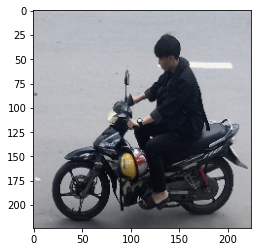

In [ ]:
im = load_img("/content/IMG_E5750.JPG",target_size=(224,224))
width, height = im.size
xx = width*0.2
yy =0
w = width*0.9
h = height*0.50
    # Cropped image of above dimension 
    # (It will not change orginal image) 
im1 =im.crop((xx, yy, w, h))
im1= np.array (im1) 
im2 = cv2.GaussianBlur(im1, (3, 3), 0)
a = cv2.Canny(im2, 150, 200)
a=cv2.resize(a,(224,224))
b=features_grid(a)
    # Shows theimage in image viewer 
pre= model.predict(b.reshape(1,-1))
print(pre)
plt.imshow(im)

[0]


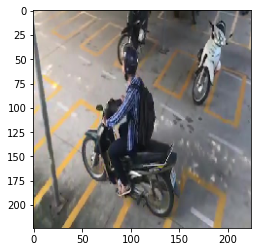

In [ ]:
im = load_img("/content/video-1594976299 06.jpg",target_size=(224,224))
img_array = img_to_array(x)
img_array = np.expand_dims(img_array, axis=0)
features = vgg.predict(img_array)
features_=np.array(features)
pred=model1.predict(features_.reshape(-1,7*7*512))
print(pred)
plt.imshow(im)